<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 OBSERVING EXERCISE I- Part 1</h2>
<h4>All elements are due by October 30th at 11:59pm.</h4>
<i>I know that this is soon, but things need to work on a somewhat accelerated timescale for us to be ready for our observing.</i>

<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.</i>  

As a key element in this class, we are planning to observe remotely with the 42-inch telescope at Mt. Laguna Observatory (MLO) east of San Diego. The telescope is equipped with a CCD camera and a variety of broad and intermediate-band filters. The broad-band filters include the standard UBVRI set. The plan is to use the scope potentially (weather permitting) to obtain photometry of an open cluster.

Places in code blocks where you will need to modify the code are marked by 
"#********************"

All your answers should be entered using the python notebook templates provided as part of this assignment. Each student will need to hand in their own notebook by uploading it to a new repository on GitHub.  Just make a repository and add me as a collaborator.

<i><u>Please save your work to github often, even if you are not complete.  That is a good strategy for backing up your work and also means that you can access it from other computers.</u></i>

<h3>Part 1</h3>
To plan your observing, you need to derive a few basics about the combined scope/ instrumentation. The 1.0m telescope at MLO has an optics combination that results in an effective f/7.5 ratio. It is equipped with an electronically cooled E2V42-40 CCD camera and a dual filter wheel assembly from ACE, Inc. The spec sheet for this chip iwas provided to you separately. 

<b><u>A)    Given the CCD type and the telescope optics:
<ol> 
    <li>What will be the size in arcseconds of the typical CCD pixel on the E2V42-40 chip.</li>
    <li>What is the field of view (FOV) of the 1.0m CCD camera in arc minutes? By FOV I mean the length of one side of the detector. </li>
<ol>
</u></b>
    

   

In [1]:
#Answer A) Here
#You will need to use simple mathematical expressions and what you learned in class to find the asnwers to these.  
#In order to get credit for this part you will need to write an expression that properly executes and results in the answer
#You will need an expression for both parts 1 and 2 above

#part 1
squarePixels = 13.5
MPerPixel = 0.000001
FocalLength = 7.5 / 1
scale = (squarePixels * MPerPixel)*(206265)/FocalLength
print(scale)

#part 2
NumPixels = 2048
FOV = scale * NumPixels / 60
print(FOV)

0.37127699999999997
12.672921599999999


We are using the telescope on Nov. 4-6. We will need to begin the telescope setup procedure about 1 hour before Sunset so that we are ready to begin taking frames once it becomes dark enough to observe and we can take some calibration frames while the sky is still bright enough. (Note: since we are observing from Mount Laguna Observatory (MLO), a couple of ours East of San Diego, all the questions below need to be answered as if you were at MLO. We can then add 2 hours to the times to account for the local observing schedule.) Daylight savings time ends at 2am on Nov. 3, so you will need to double check that any relation between local time and UTC accounts for this change.

<b><u>B)    When does sunset occur on Nov. 4? (DST ends on Nov. 3)</u></b>  <i> The end of the code prints your answer in UTC.  You need to also print it in MLO and Lawrence time.</i>

In [2]:
#There is a function in the python package astroplan to find the sunset time for a given location and date:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.sun_set_time
#This function is a part of the observer class, and takes an input Time object from astropy corresponding to 
# the date. See documentation for astropy's Time object here for reference if needed:
#    https://docs.astropy.org/en/stable/api/astropy.time.Time.html
#Here's an example of how this function works:
#
#    Time_date = Time('2001-05-27')
#    observer_object = Observer(longtiude = -155.0903*u.deg, latitude = 19.7026*u.deg, elevation = 100.0*u.m, name = "Subaru",timezone = "US/Hawaii")
#    sunset_time = observer_object.sun_set_time(Time_date, which = "next")
#
#Note here that Time_date is the date of observation, and which="next" instructs the function to provide the next sunset time
#For details on the observer object, to be used throughout this assignment, see here:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html
#In general, the observer object takes in a longtiude, latitude, elevation (we assign this as 0), a name of your choice, and a timezone.
#You can view a list of available timezones on this stackoverflow thread:
#    https://stackoverflow.com/questions/13866926/is-there-a-list-of-pytz-timezones


#We import the necessary packages for this section
from astroplan import Observer
from astropy.time import Time
import astropy.units as u
#import warnings
#warnings.filterwarnings("ignore")

#****************
#Here you will need to define the coordinates of the MLO observatory. Note that W and S have negative values (whereas E and N are positive).
#The latitude and longitude need to be put in decimal form, e.g. long = 20.0003, lat = 33.33333 (those are not the right coordinates)
_LONGITUDE_ = (-116.427568)
_LATITUDE_ = 32.841858

#This is an astropy Time object, with a time value that corresponds to the date of observation. Date format: Time('YYYY-MM-DD')
_TIME_ = Time('2019-11-06')

#This makes the observer object for the MLO observatory. 
MLO_observer = Observer(longitude = _LONGITUDE_*u.deg, latitude = _LATITUDE_*u.deg, elevation = 1859.0*u.m, name = "MLO",timezone = "US/Pacific") #*********

#This computes the sunset at the time specified by the TIME object, at the location defined by ML_observer
sunset_time = MLO_observer.sun_set_time(_TIME_, which = "next") #*********


#The following provides a useful way to print out astropy Time objects in a convenient way. 
#The time returned here is in UTC time
print("Sunset: {0.iso}".format(sunset_time)) 

#*****************
#put calculation here to find sunset time at MLO and in Lawrence.  Also include code to print answers.
sunset_LK = sunset_time - 0.25
sunset_MLO = sunset_LK - 0.083
print("Sunset Lawrence: {0.iso}".format(sunset_LK))
print("Sunset MLO: {0.iso}".format(sunset_MLO))


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


Sunset: 2019-11-06 00:47:05.767
Sunset Lawrence: 2019-11-05 18:47:05.767
Sunset MLO: 2019-11-05 16:47:34.567


Note – technically, sunset refers to the moment when the entire disk of the sun sinks below the horizon. However, the sky is still quite bright because of scattered/refracted light from the seeing sun. The next key moment is the end of twilight, defined as the moment when the sun’s center is a certain number of degrees below the horizon: civil twilight = 6°, astronomical twilight = 18°. At astronomical twilight, it should be totally dark (Moon excluded).

<b><u>C)    When does <font color="red">astronomical twilight</font> occur on Nov. 4?</u></b><i> The end of the code prints your answer in UTC.  You need to also print it in MLO and Lawrence time.</i>

In [3]:
#There is an astroplan function that can be used to find astronomical twilight for a given time and position(observer):
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.twilight_evening_astronomical
#This function is a part of the observer class in astroplan, and its inputs are a time object corresponding to
#the date of observation, and an argument which, with possible values previous, nearest, or next, which choose
#the corresponding astronomical twilight to find
#Example:
#    observer_object = Observer(location=location, name="Subaru", timezone="US/Hawaii")
#    astro_twilight = observer_object.twilight_evening_astronomical(Time_date, which = "next")

###
#*******************
#Answer C) Here. YOUR CODE: 
astro_twilight = MLO_observer.twilight_evening_astronomical(_TIME_, which="next")

#The following provides a useful way to print out astropy Time objects in a convenient way. 
print("Astronomical Twilight: {0.iso}".format(astro_twilight)) 

Astronomical Twilight: 2019-11-06 02:15:13.305


Convert the UTC output to the local time both at MLO and in Lawrence and put the answer and the calculation in the next cell.  The result of the cell should print out the twilight time at both locations.

In [4]:
#Part C answer goes here
print("Astronomical Twilight: {0.iso}".format(astro_twilight)) 

#Lawrence time
astro_twilight_LK = astro_twilight - 0.25
print("Astronomical Twilight Lawrence: {0.iso}".format(astro_twilight_LK))
#MLO time
astro_twilight_MLO = astro_twilight_LK - 0.083
print("Astronomical Twilight MLO: {0.iso}".format(astro_twilight_MLO))

Astronomical Twilight: 2019-11-06 02:15:13.305
Astronomical Twilight Lawrence: 2019-11-05 20:15:13.305
Astronomical Twilight MLO: 2019-11-05 18:15:42.105


We will be observing for the first half of the night. Given your answer to (C), we will divide the evening into two time slots, each 2.5 HRS long. Let AT = Astronomical Twilight, then the 2 slots are:
<ol>
    <li> <b>time slot 1</b> = AT + 0.5 HR to AT + 3.0 HRS</li>
    <li> <b>time slot 2</b> = AT + 3.0 HRS to AT+ 5.5 HRS</li>
</ol>
The names of everyone and their time slots were posted in the lecture notes. You should work within your group to prepare the observing materials discussed below, but everyone will need to hand in their own notebook.

For your group/time slot:

<b><u>D) What is the optimum range of RA for objects that you would ideally observe during your 2.5-hour session?</u></b> Note: <i>Think about whether objects of a given RA are rising or settng at the beginning and end of your observation session.</i>

Go to the web page https://www.iiap.res.in/people/personnel/reks/software/javascript/calclst.php to find the sidereal time at different local times.  

In the first row, enter the date and desired local time at MLO.  In the second line, enter your shift from UTC to MLO and the longitude of MLO.  Hit return in any box to update.  

Enter the information in the empty markdown box below and make sure to give a rationale as to why this range of RA is appropriate.

LST: 22.00 - 0.5
RA between 22hr (330 degree) and 0.5hr (7.5 degree) because objects at this RA will be visible near the zenith between 18:45 and 21:15.



You can include LaTeX text such as $\alpha^2$ in your answer.  

<b><u>E) If you want to remain within 30° of the zenith, what is the optimum range in declination? You need to answer this in two parts:

1\. Given the location of the observatory, objects at their transit need to have what range of declination to be within 30° of the zenith.<i>  This requires a straightforward calculation</i>
</u> </b>


In [5]:
#Answer E) Between 10 and 55 degrees declination
#Part 1:
#   Figure out how to use the observatory's location to find the position of the zenith.
#The declination at the zenith is the same as the latitude, 32.8 degrees


<b><u>
2\. Using airmass plots, determine what range of declinations would keep objects within 30° of the zenith over the course of your 2.5 hour observation block. Your answer will need to include airmass plots to demonstrate this. These plots can contain multiple curves, e.g. for different RA and DEC combinations, as long as the curves are labeled. All plots should come with a caption.</li>
    </u> </b>


In [6]:
#Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=7.5*u.deg, dec=20*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()


<Figure size 640x480 with 1 Axes>

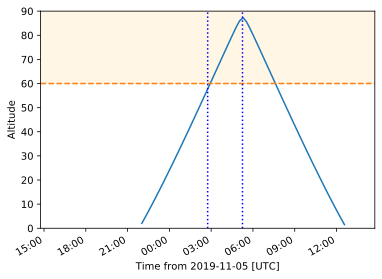

In [7]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=7.5*u.deg, dec=30*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')


plt.show()





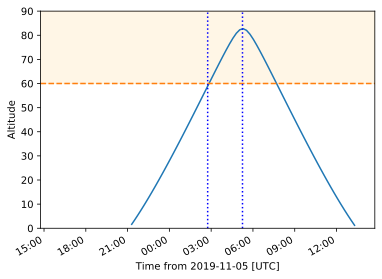

In [8]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=7.5*u.deg, dec=40*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

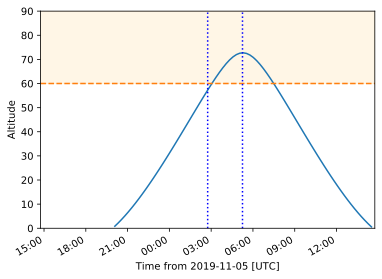

In [9]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=7.5*u.deg, dec=50*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

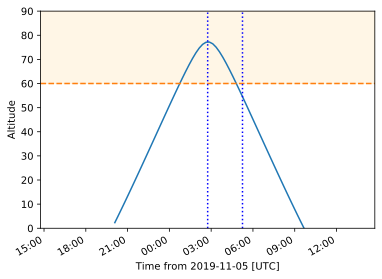

In [10]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=330*u.deg, dec=20*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

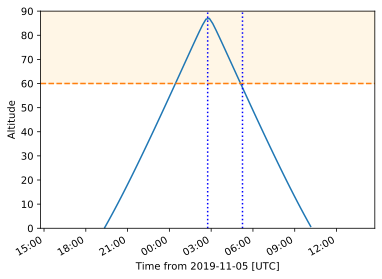

In [11]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=330*u.deg, dec=30*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

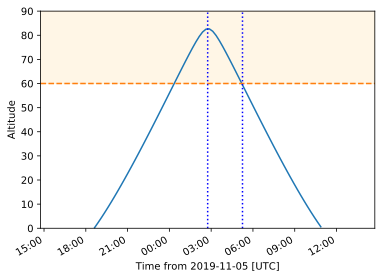

In [12]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=330*u.deg, dec=40*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

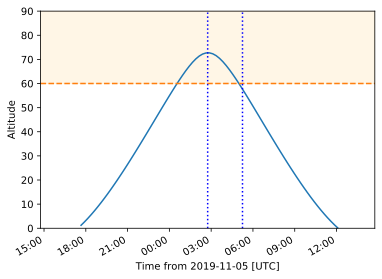

In [13]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=330*u.deg, dec=50*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

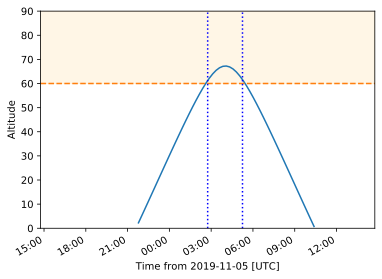

In [14]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=348.75*u.deg, dec=10*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

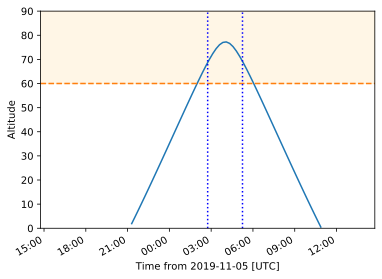

In [15]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=348.75*u.deg, dec=20*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

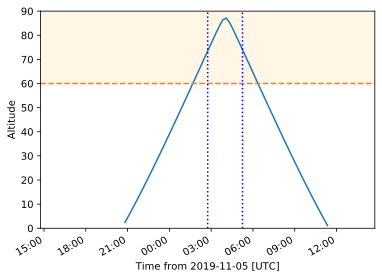

In [16]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=348.75*u.deg, dec=30*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

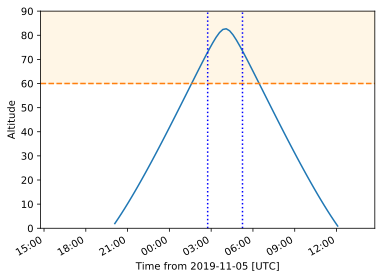

In [17]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=348.75*u.deg, dec=40*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

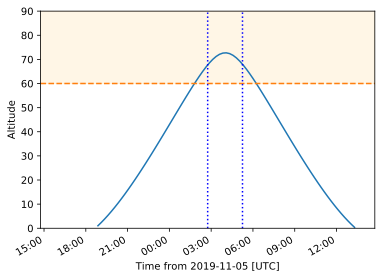

In [18]:
#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
##Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis
observation_time = Time('2019-11-06 2:45:00') 

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.
target_coord = SkyCoord(ra=348.75*u.deg, dec=50*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

When we select a target, the RA should be between 22 hours (330 degrees) and 0.5 hours (7.5 degrees) so that the object is visibile in the sky the entire observing time. We also want to make sure the object will be 30 degrees from the zenith so for our declination should be between 10 and 50. 

An ideal target would have an RA of 23.25 hours (348.75 degrees) because it will cross the meridian and be the at its highest point in the sky in the middle of our observing run. This will decrease the airmass that we are viewing the target through during the beginning or end of the observing run. An ideal target would also have a declination of nearly 32.8 degrees due to this being the zenith. You do not want your target to have a declination of exactly 32.8 because the telescope will have to turn when the object reaches the zenith. A good range of declinations would be between 22.8 and 42.8 degrees.


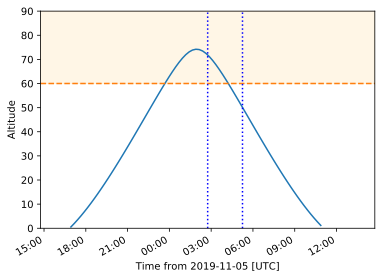

In [19]:

from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

observation_time = Time('2019-11-06 2:45:00') 

target_coord = SkyCoord(ra=317.7166667*u.deg, dec=48.53666667*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')

plt.show()

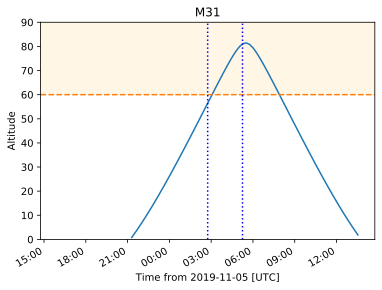

In [21]:
#M31 Andromeda
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

observation_time = Time('2019-11-06 2:45:00') 

target_coord = SkyCoord(ra=10.68333333*u.deg, dec=41.26916667*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')
plt.title("M31")
plt.show()

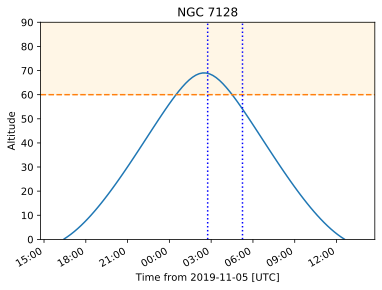

In [22]:
#NGC 7128
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

observation_time = Time('2019-11-06 2:45:00') 

target_coord = SkyCoord(ra=325.8083333*u.deg, dec=53.715*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')
plt.title("NGC 7128")
plt.show()

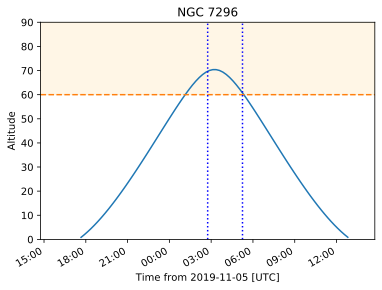

In [23]:
#NGC 7296
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

observation_time = Time('2019-11-06 2:45:00') 

target_coord = SkyCoord(ra=337.0083333*u.deg, dec=52.31666667*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')
plt.title("NGC 7296")
plt.show()

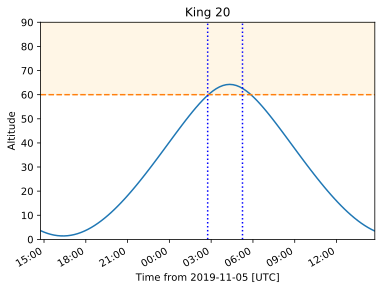

In [24]:
#King 20
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

observation_time = Time('2019-11-06 2:45:00') 

target_coord = SkyCoord(ra=353.3208333*u.deg, dec=58.47583333*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plut_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,MLO_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

ymin, ymax = ax.get_ylim()
y_line = np.linspace(ymin, ymax, 100)
UTC_start = astro_twilight_MLO + 0.5/24
UTC_end = astro_twilight_MLO + 3/24
#x = [UTC_start] * 100
xstart = np.array([xmin + 0.5] * 100)
ax.plot(xstart, y_line, ls = ':', color = 'blue')
xend = xstart + [2.5/24]
ax.plot(xend, y_line, ls = ':', color = 'blue')
plt.title("King 20")
plt.show()